Import Library form python env

In [34]:
import pandas as pd
import numpy as np
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from jcopml.plot import plot_missing_value 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from io import StringIO

Preprocessing Data

In [35]:
# Read dataset
data = pd.read_csv('data_motor_mogok.csv')
data.head(5)

,No.,Nama,Merek,Tahun,Jarak,Servis_Ringan,Mogok
0,1,Vario,Honda,5,234898,12,Mogok
1,2,Vario,Honda,2,74083,7,Tidak Mogok
2,3,Mio,Yamaha,5,244215,14,Mogok
3,4,Vario,Honda,3,86655,10,Tidak Mogok
4,5,Mio,Yamaha,7,277284,19,Mogok


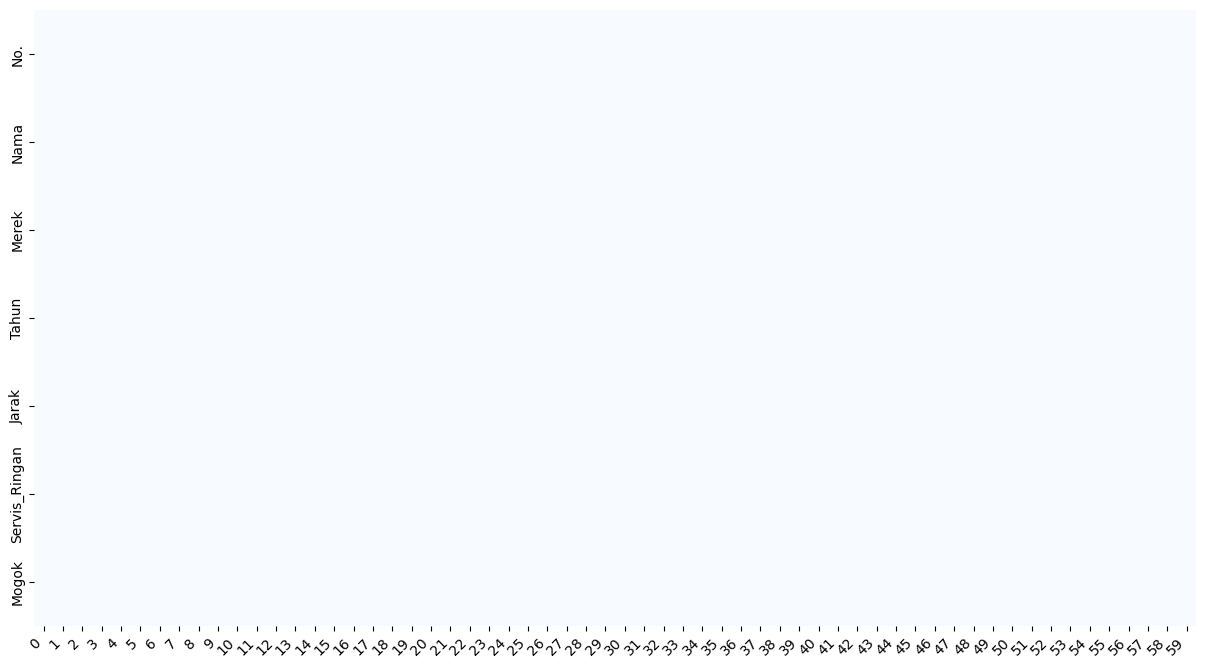

In [36]:
# Check dataset if any empy number
plot_missing_value(data)

In [37]:
# Check type data 
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            60 non-null     int64 
 1   Nama           60 non-null     object
 2   Merek          60 non-null     object
 3   Tahun          60 non-null     int64 
 4   Jarak          60 non-null     int64 
 5   Servis_Ringan  60 non-null     int64 
 6   Mogok          60 non-null     object
dtypes: int64(4), object(3)
memory usage: 3.4+ KB


In [38]:
# Removing the unnecassary features from the dataset
data = data.drop(['No.'], axis=1)

Encoding Data 

In [39]:
# Encoding dtype nama and merek object to categorical
# One Hot Encoding with pandas 

data = pd.get_dummies(data, columns=['Nama', 'Merek'], prefix=['Nama', 'Merek'])

data.head(5)

,Tahun,Jarak,Servis_Ringan,Mogok,Nama_Aerox,Nama_Beat,Nama_CB 150 R,Nama_Jupiter MX,Nama_Jupiter Z,Nama_Mio,...,Nama_R15,Nama_Revo,Nama_Scoopy,Nama_Soul,Nama_Soul GT,Nama_Supra X,Nama_Vario,Nama_Vixion,Merek_Honda,Merek_Yamaha
0,5,234898,12,Mogok,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,74083,7,Tidak Mogok,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,5,244215,14,Mogok,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,86655,10,Tidak Mogok,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,7,277284,19,Mogok,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Split Train and Test Data

In [40]:
# splitting the data into training and testing set
x = data.drop(['Mogok'], axis=1)
y = data['Mogok']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train.columns)

(54, 22) (6, 22) (54,) (6,)
Index(['Tahun', 'Jarak', 'Servis_Ringan', 'Nama_Aerox', 'Nama_Beat',
       'Nama_CB 150 R', 'Nama_Jupiter MX', 'Nama_Jupiter Z', 'Nama_Mio',
       'Nama_Mio GT', 'Nama_Mio J', 'Nama_Nmax', 'Nama_R15', 'Nama_Revo',
       'Nama_Scoopy', 'Nama_Soul', 'Nama_Soul GT', 'Nama_Supra X',
       'Nama_Vario', 'Nama_Vixion', 'Merek_Honda', 'Merek_Yamaha'],
      dtype='object')


Modeling C4.5 

In [41]:
model_dtree = DecisionTreeClassifier(max_depth=3, criterion="entropy")
model_dtree.fit(x_train, y_train)
model_dtree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Prediction

In [42]:
y_pred = model_dtree.predict(x_test)

print(y_pred[0:5])
print(y_test[0:5])

['Mogok' 'Tidak Mogok' 'Tidak Mogok' 'Tidak Mogok' 'Tidak Mogok']
0           Mogok
5     Tidak Mogok
36    Tidak Mogok
45    Tidak Mogok
13          Mogok
Name: Mogok, dtype: object


Evaluation

In [43]:
from sklearn.metrics import accuracy_score

print('Akurasi Decision Tree :', accuracy_score(y_test, y_pred))

Akurasi Decision Tree : 0.8333333333333334


Visualisation

In [44]:
dot_data = StringIO()
filename = 'decision_tree.png'
feature_names = x_train.columns

# Use export_graphviz to generate the DOT format data
export_graphviz(model_dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names=feature_names, class_names=["No Mogok", "Mogok"])

# Create a graph from the DOT format data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the graph to a PNG file
graph.write_png(filename)

# Display the PNG image
img = mpimg.imread(filename)
plt.figure(figsize=(200, 100))
plt.imshow(img, interpolation='nearest')
plt.show()